In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import math
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

insurance_df = pd.read_csv('insurance.csv')
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
insurance_df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [4]:
print("Insurance Cost Data Shape:",insurance_df.shape)
print("\nInformation of Insurance Cost:\n")
insurance_df.info()
print("\nStatistical Analysis of Insurance Cost:\n")
insurance_df.describe()

Insurance Cost Data Shape: (1338, 7)

Information of Insurance Cost:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB

Statistical Analysis of Insurance Cost:



,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
insurance_df['charges'].value_counts()

,count
charges,
1639.56310,2
2221.56445,1
19798.05455,1
13063.88300,1
13555.00490,1
...,...
1149.39590,1
37079.37200,1
4738.26820,1


### Dropping Null and Duplicates

In [6]:
print("NaN values present in Insurance Cost: ",insurance_df.isnull().values.sum())
print("Duplicates present in Insurance Cost: ",insurance_df.duplicated().sum())
insurance_df = insurance_df.drop_duplicates(keep='first')
print("Final Duplicates Count: ",insurance_df.duplicated().sum())

NaN values present in Insurance Cost:  0
Duplicates present in Insurance Cost:  1
Final Duplicates Count:  0


### Visualization of Numeric Columns

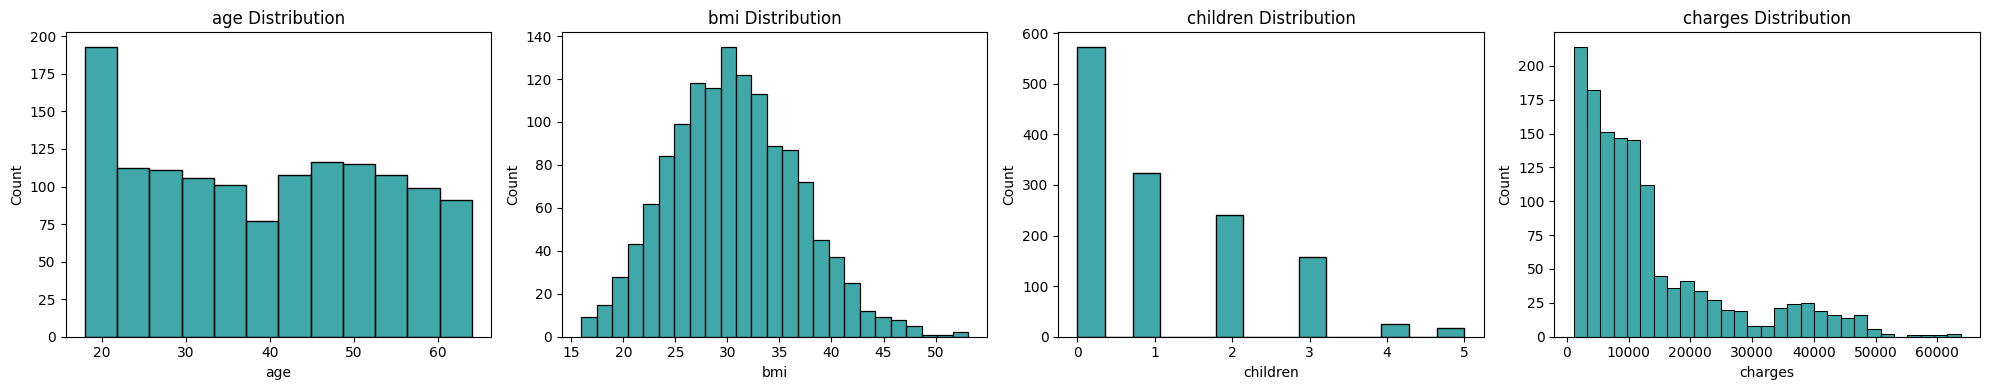

In [7]:
# Selecting all the numerical columns (int and float)
numeric_cols = insurance_df.select_dtypes(include=['int64', 'float64']).columns

fig, axes = plt.subplots(1, len(numeric_cols), figsize=(5 * len(numeric_cols), 4))
for j, col in enumerate(numeric_cols):
    sns.histplot(insurance_df[col], ax=axes[j], color='darkcyan')
    axes[j].set_title(f'{col} Distribution')

plt.tight_layout()
plt.show()

### Visualization of Object Columns

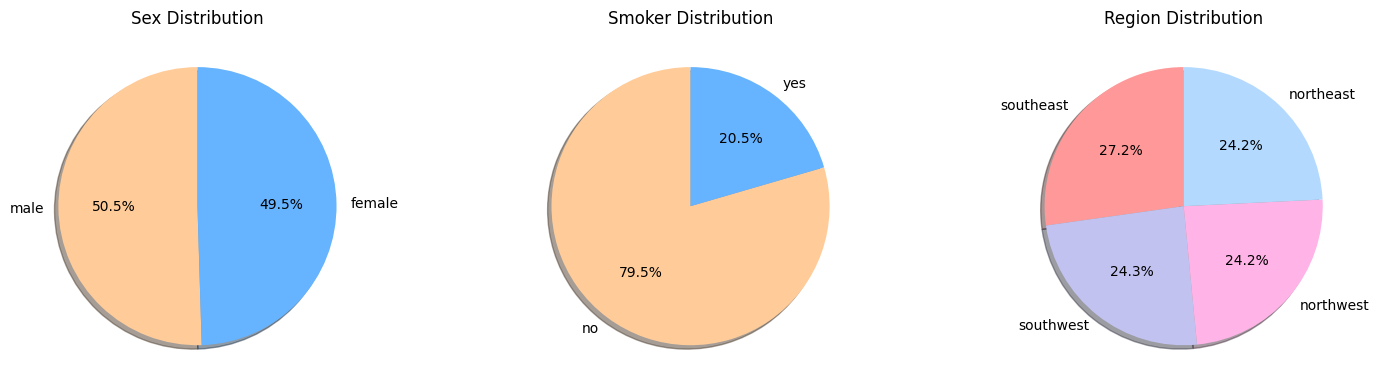

In [8]:
# Selecting all the object columns
object_columns = insurance_df.select_dtypes(include='object').columns

fig, axes = plt.subplots(1, len(object_columns), figsize=(5 * len(object_columns), 4))
for j, col in enumerate(object_columns):
    if j == len(object_columns) - 1:
        pie_colors = ['#ff9999', '#c2c2f0', '#ffb3e6', '#b3d9ff']
    else:
        pie_colors = ['#ffcc99', '#66b3ff', '#99ff99', '#fabf15']

    insurance_df[col].value_counts().plot.pie(
        ax=axes[j],
        autopct='%1.1f%%',
        startangle=90,
        shadow=True,
        colors=pie_colors
    )
    axes[j].set_title(f'{col.capitalize()} Distribution')
    axes[j].set_ylabel('')  # Hide y-axis label

plt.tight_layout()
plt.show()

In [12]:
# One-hot encoding for 'sex', 'smoker', and 'region' columns
insurance_df = pd.get_dummies(insurance_df, columns=['sex', 'smoker', 'region'], drop_first=False)
insurance_df

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,False,True,True,False,False,True,False,False
1334,18,31.920,0,2205.98080,True,False,True,False,True,False,False,False
1335,18,36.850,0,1629.83350,True,False,True,False,False,False,True,False
1336,21,25.800,0,2007.94500,True,False,True,False,False,False,False,True


In [13]:
insurance_df.to_csv('insurance_cost_prediction.csv', index=False)
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1337 non-null   int64  
 1   bmi               1337 non-null   float64
 2   children          1337 non-null   int64  
 3   charges           1337 non-null   float64
 4   sex_female        1337 non-null   bool   
 5   sex_male          1337 non-null   bool   
 6   smoker_no         1337 non-null   bool   
 7   smoker_yes        1337 non-null   bool   
 8   region_northeast  1337 non-null   bool   
 9   region_northwest  1337 non-null   bool   
 10  region_southeast  1337 non-null   bool   
 11  region_southwest  1337 non-null   bool   
dtypes: bool(8), float64(2), int64(2)
memory usage: 62.7 KB


Splitting

In [15]:
insuranceX = insurance_df.drop('charges',axis=1)
insuranceY = insurance_df['charges']

ins_Xtr, ins_Xts, ins_Ytr, ins_Yts = train_test_split(insuranceX, insuranceY, test_size=0.4, random_state=20)
ins_Xva, ins_Xts, ins_Yva, ins_Yts = train_test_split(ins_Xts, ins_Yts, test_size=0.5, random_state=20)

In [16]:
ins_Xtr

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
683,53,24.320,0,False,True,True,False,False,True,False,False
519,31,30.875,0,False,True,True,False,True,False,False,False
1245,28,24.300,5,False,True,True,False,False,False,False,True
769,38,19.475,2,True,False,True,False,False,True,False,False
218,26,29.920,1,True,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
1243,28,33.110,0,True,False,True,False,False,False,True,False
925,50,32.110,2,False,True,True,False,True,False,False,False
1248,18,39.820,0,True,False,True,False,False,False,True,False
271,50,34.200,2,False,True,False,True,False,False,False,True


In [17]:
ins_Xts

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
1,18,33.770,1,False,True,True,False,False,False,True,False
1013,48,32.300,1,False,True,True,False,False,True,False,False
1207,36,33.400,2,False,True,False,True,False,False,False,True
773,19,28.880,0,True,False,False,True,False,True,False,False
1057,45,31.790,0,True,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
605,51,34.100,0,True,False,True,False,False,False,True,False
1318,35,39.710,4,False,True,True,False,True,False,False,False
420,64,33.880,0,False,True,False,True,False,False,True,False
1186,20,35.625,3,False,True,False,True,False,True,False,False


In [18]:
ins_Xva

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
790,39,41.800,0,True,False,True,False,False,False,True,False
450,39,29.600,4,False,True,True,False,False,False,False,True
313,49,35.860,0,False,True,True,False,False,False,True,False
1118,33,35.750,1,False,True,False,True,False,False,True,False
813,28,22.515,2,False,True,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
244,63,27.740,0,True,False,False,True,True,False,False,False
530,57,42.130,1,False,True,False,True,False,False,True,False
165,47,28.215,4,False,True,True,False,True,False,False,False
1219,38,30.210,3,True,False,True,False,False,True,False,False


### Gradient Boosting Regressor

In [19]:
# train, validation and testing of Gradient Boosting Regressor

from sklearn.ensemble import GradientBoostingRegressor

params_regressors = { 'loss':['squared_error', 'absolute_error', 'huber', 'quantile'],
                      'n_estimators': [100, 30, 50, 80],
                      'criterion': ['friedman_mse', 'squared_error']
                    }

ins_model = GradientBoostingRegressor()
ins_model = GridSearchCV(ins_model, params_regressors, cv=2)
ins_model.fit(ins_Xtr, ins_Ytr)
print("Chosen Parameters by GB Regressor:\n")
print(ins_model.best_params_)

ins_model = ins_model.best_estimator_
ins_model.fit(ins_Xtr, ins_Ytr)

ins_Ypred = ins_model.predict(ins_Xva)
print("\n==Validation of Gradient Boosting==\n")
print("R2 Score :", r2_score(ins_Yva, ins_Ypred)*100)
print("MAE      :", mean_absolute_error(ins_Yva, ins_Ypred))
print("MSE      :", mean_squared_error(ins_Yva, ins_Ypred))
print("RMSE     :", math.sqrt(mean_squared_error(ins_Yva, ins_Ypred)))

ins_Ypred = ins_model.predict(ins_Xts)
print("\n==Testing of Gradient Boosting==\n")
print("R2 Score :", r2_score(ins_Yts, ins_Ypred)*100)
print("MAE      :", mean_absolute_error(ins_Yts, ins_Ypred))
print("MSE      :", mean_squared_error(ins_Yts, ins_Ypred))
print("RMSE     :", math.sqrt(mean_squared_error(ins_Yts, ins_Ypred)))

Chosen Parameters by GB Regressor:

{'criterion': 'squared_error', 'loss': 'huber', 'n_estimators': 50}

==Validation of Gradient Boosting==

R2 Score : 88.8002177407554
MAE      : 1595.7870700193948
MSE      : 16621968.935971474
RMSE     : 4077.0048977124707

==Testing of Gradient Boosting==

R2 Score : 82.89511614537659
MAE      : 1948.631859049745
MSE      : 23164742.542830046
RMSE     : 4812.976474369062


### Decision Tree Regression

In [20]:
# train, validation and testing of Decision Tree Regression

from sklearn.tree import DecisionTreeRegressor

params_regressors = { 'criterion':['squared_error','friedman_mse','absolute_error','poisson'],
                      'splitter': ['best', 'random'],
                      'max_depth': [1, 3, 5, 8]
                    }

ins_model = DecisionTreeRegressor()
ins_model = GridSearchCV(ins_model, params_regressors, cv=2)
ins_model.fit(ins_Xtr, ins_Ytr)
print("Chosen Parameters by DT Regressor:\n")
print(ins_model.best_params_)

ins_model = ins_model.best_estimator_
ins_model.fit(ins_Xtr, ins_Ytr)

ins_Ypred = ins_model.predict(ins_Xva)
print("\n==Validation of Decision Tree Regressor==\n")
print("R2 Score :", r2_score(ins_Yva, ins_Ypred)*100)
print("MAE      :", mean_absolute_error(ins_Yva, ins_Ypred))
print("MSE      :", mean_squared_error(ins_Yva, ins_Ypred))
print("RMSE     :", math.sqrt(mean_squared_error(ins_Yva, ins_Ypred)))

ins_Ypred = ins_model.predict(ins_Xts)
print("\n==Testing of Decision Tree Regressor==\n")
print("R2 Score :", r2_score(ins_Yts, ins_Ypred)*100)
print("MAE      :", mean_absolute_error(ins_Yts, ins_Ypred))
print("MSE      :", mean_squared_error(ins_Yts, ins_Ypred))
print("RMSE     :", math.sqrt(mean_squared_error(ins_Yts, ins_Ypred)))

Chosen Parameters by DT Regressor:

{'criterion': 'poisson', 'max_depth': 3, 'splitter': 'best'}

==Validation of Decision Tree Regressor==

R2 Score : 87.01802836112178
MAE      : 2731.3241090540664
MSE      : 19266975.403113842
RMSE     : 4389.416294123154

==Testing of Decision Tree Regressor==

R2 Score : 81.26528880817902
MAE      : 3091.2508836527027
MSE      : 25371979.43355252
RMSE     : 5037.060594588129


In [21]:
!apt-get install graphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


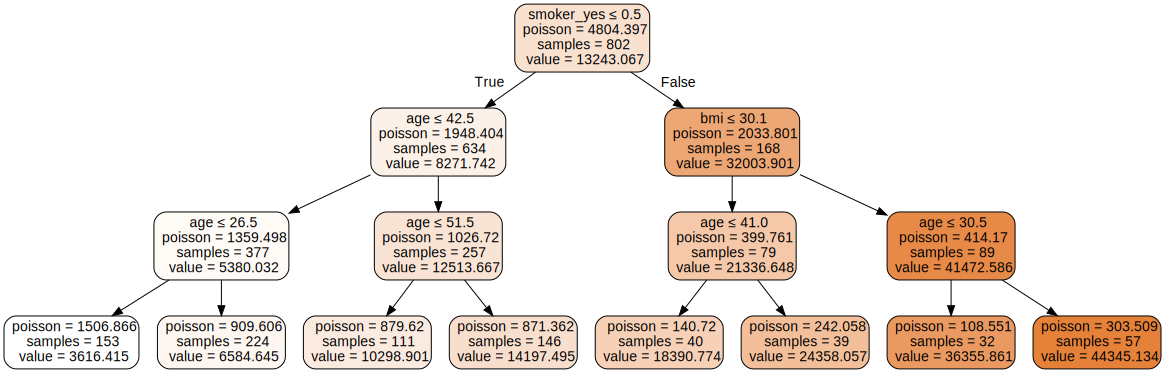

In [22]:
from sklearn.tree import export_graphviz
import graphviz
from IPython.display import display

dot_data = export_graphviz(
    ins_model,
    out_file=None,
    feature_names=ins_Xtr.columns,
    filled=True,
    rounded=True,
    special_characters=True
)

graph = graphviz.Source(dot_data)
graph.render("DTC", format="pdf", cleanup=True);
display(graph)

### Random Forest Regression

In [23]:
# train, validation and testing of Random Forest Regression

from sklearn.ensemble import RandomForestRegressor

params_regressors = { 'criterion':['squared_error','friedman_mse','absolute_error','poisson'],
                      'n_estimators': [20, 30, 100],
                      'max_depth': [1, 3, 5, 8]
                    }

ins_model = RandomForestRegressor()
ins_model = GridSearchCV(ins_model, params_regressors, cv=2)
ins_model.fit(ins_Xtr, ins_Ytr)
print("Chosen Parameters by RF Regressor:\n")
print(ins_model.best_params_)

ins_model = ins_model.best_estimator_
ins_model.fit(ins_Xtr, ins_Ytr)

ins_Ypred = ins_model.predict(ins_Xva)
print("\n==Validation of Random Forest Regressor==\n")
print("R2 Score :", r2_score(ins_Yva, ins_Ypred)*100)
print("MAE      :", mean_absolute_error(ins_Yva, ins_Ypred))
print("MSE      :", mean_squared_error(ins_Yva, ins_Ypred))
print("RMSE     :", math.sqrt(mean_squared_error(ins_Yva, ins_Ypred)))

ins_Ypred = ins_model.predict(ins_Xts)
print("\n==Testing of Random Forest Regressor==\n")
print("R2 Score :", r2_score(ins_Yts, ins_Ypred)*100)
print("MAE      :", mean_absolute_error(ins_Yts, ins_Ypred))
print("MSE      :", mean_squared_error(ins_Yts, ins_Ypred))
print("RMSE     :", math.sqrt(mean_squared_error(ins_Yts, ins_Ypred)))

Chosen Parameters by RF Regressor:

{'criterion': 'poisson', 'max_depth': 3, 'n_estimators': 30}

==Validation of Random Forest Regressor==

R2 Score : 87.57650864270512
MAE      : 2641.3234766080272
MSE      : 18438116.263091855
RMSE     : 4293.962769178589

==Testing of Random Forest Regressor==

R2 Score : 81.98767696429887
MAE      : 3019.079026545115
MSE      : 24393666.117032528
RMSE     : 4938.99444391594


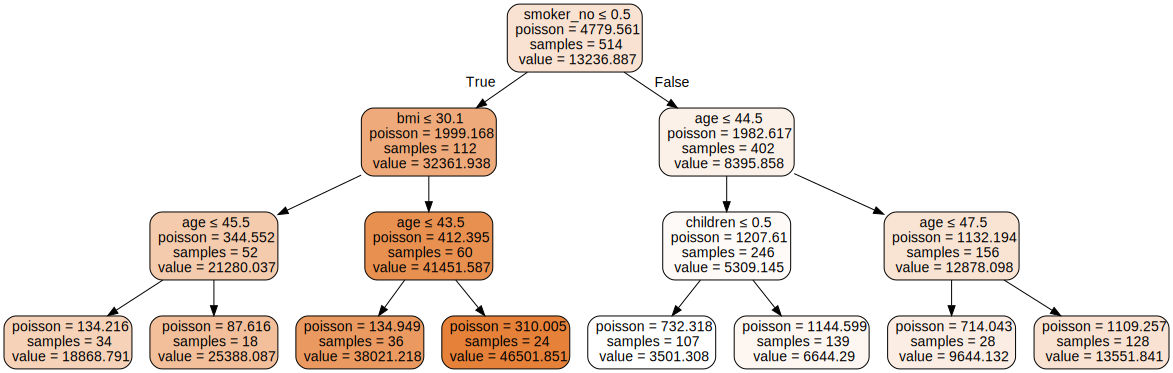

In [24]:
# Visualizing the 1st tree from the Random Forest
estimator = ins_model.estimators_[0]

dot_data = export_graphviz(
    estimator,
    out_file=None,
    feature_names=ins_Xtr.columns,
    filled=True,
    rounded=True,
    special_characters=True
)

graph = graphviz.Source(dot_data)
graph.render("RFC", format="pdf", cleanup=True);
display(graph)

### Combining Tree Models using Voting Regressor

In [25]:
# train, validation and testing of Hard Voting
from sklearn.ensemble import VotingRegressor as insurance_VoteRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

ins_model_gbc = GradientBoostingRegressor(criterion= 'friedman_mse', loss= 'huber', n_estimators= 50)
ins_model_dtc = DecisionTreeRegressor(criterion= 'poisson', max_depth= 3, splitter= 'best')
ins_model_rfc = RandomForestRegressor(criterion= 'poisson', max_depth= 3, n_estimators= 30)
ins_model = insurance_VoteRegressor(estimators=[('GBC', ins_model_gbc), ('DTC', ins_model_dtc), ('RFC', ins_model_rfc)])
ins_model.fit(ins_Xtr, ins_Ytr)

ins_Ypred = ins_model.predict(ins_Xva)
print("\n==Validation of GBC, DTC and RFC using Voting Regressor==\n")
print("R2 Score :", r2_score(ins_Yva, ins_Ypred)*100)
print("MAE      :", mean_absolute_error(ins_Yva, ins_Ypred))
print("MSE      :", mean_squared_error(ins_Yva, ins_Ypred))
print("RMSE     :", math.sqrt(mean_squared_error(ins_Yva, ins_Ypred)))

ins_Ypred = ins_model.predict(ins_Xts)
print("\n==Testing of GBC, DTC and RFC using Voting Regressor==\n")
print("R2 Score :", r2_score(ins_Yts, ins_Ypred)*100)
print("MAE      :", mean_absolute_error(ins_Yts, ins_Ypred))
print("MSE      :", mean_squared_error(ins_Yts, ins_Ypred))
print("RMSE     :", math.sqrt(mean_squared_error(ins_Yts, ins_Ypred)))


==Validation of GBC, DTC and RFC using Voting Regressor==

R2 Score : 88.26652920131518
MAE      : 2293.5412066582753
MSE      : 17414033.827834617
RMSE     : 4173.012560229674

==Testing of GBC, DTC and RFC using Voting Regressor==

R2 Score : 82.46625541138573
MAE      : 2667.678747339539
MSE      : 23745538.56425071
RMSE     : 4872.939417256356


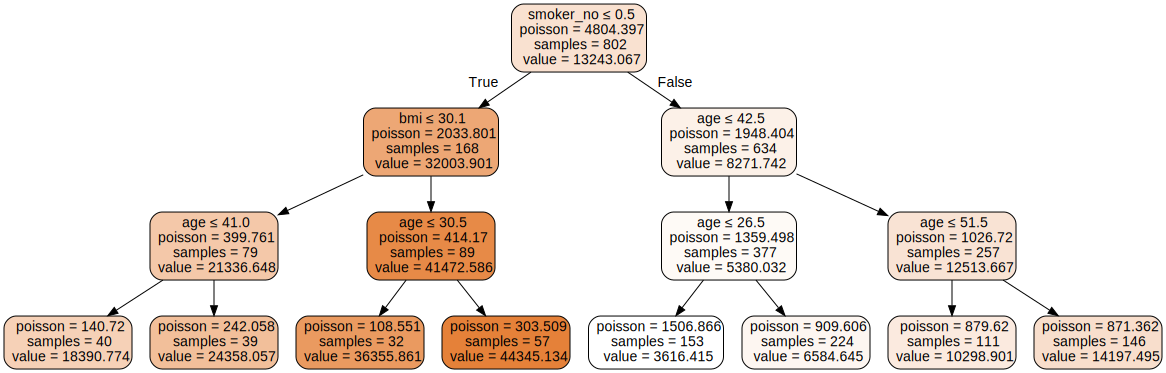

In [26]:
# Get the DTC model from Voting Regressor
dtc_model = ins_model.named_estimators_['DTC']

dot_data = export_graphviz(
    dtc_model,
    out_file=None,
    feature_names=ins_Xtr.columns,
    filled=True,
    rounded=True,
    special_characters=True
)

graph = graphviz.Source(dot_data)
graph.render("DTC-Voting Regressor", format="pdf", cleanup=True);
display(graph)

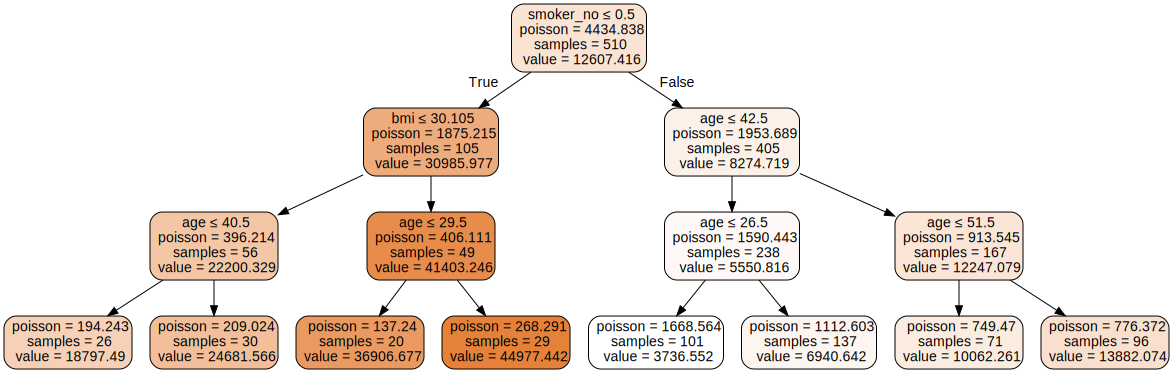

In [27]:
# Get the RFC model from Voting Regressor
rfc_model = ins_model.named_estimators_['RFC']

# Visualize the first tree from the Random Forest
estimator = rfc_model.estimators_[0]

dot_data = export_graphviz(
    estimator,
    out_file=None,
    feature_names=ins_Xtr.columns,
    filled=True,
    rounded=True,
    special_characters=True
)

graph = graphviz.Source(dot_data)
graph.render("RFC-Voting Regressor", format="pdf", cleanup=True);
display(graph)